<b><span style="font-size: 24px;">Clustering Assignment</span></b>

<b>Problem Statement:</b>
Develop an unsupervised learning technique to cluster the dataset given into 'n' distinct clusters.

Also, to identify the most important features and their corresponding values that contribute significantly to the grouping of data points within these clusters.

The dataset shared is related breast cancer cases which contains targeted sequencing data of 1,980 primary breast cancer samples. 
The dataset consists of 1903 data points, each described by 693 features. These incluse numeric as well as non numeric features.

<b>Note:</b>Given the high number of features,the dataset at hand has <span style="color: red;">high dimensionality </span>.

<b><span style="font-size: 20px;"> Objective: </span></b>

1. <b>Clustering:</b> Implement an unsupervised learning algorithm to partition the data points into 'n' clusters. You should select an appropriate clustering algorithm based on the characteristics of the dataset and the problem requirements.
2. <b>Feature Importance:</b> Identify the most important features that influence the formation of clusters. Determine the relevance and significance of each feature in grouping data points together. 
3. <b>Feature Values:</b> Determine the specific values or ranges of values for the identified important features that are associated with each cluster. In other words, find the feature-value combinations that differentiate one cluster from another.

<span style="font-size: 16px;">Since we have understood the problem statement here, we follow the below steps to solve the problem </span>

<b><span style="font-size: 20px;">The Steps involved to solve this assignment are as follows:</span></b>

1. Importing all the required python libraries
2. Loading the dataset and filling missing values,encoding to make it suitable for further operations
3. Principal Component Analysis to reduce dimensionality
4. Performing different clustering algorithms and checking important features and feature values as applicable
5. Comparing different algorithm outcomes and conclusion

<b><span style="font-size:20px"> Importing Python Libraries</span></b>

In [1]:
# Importing all important python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.decomposition import PCA

<b><span style="font-size:20px"> Loading Dataset </span></b>

In [2]:
# Importing the dataset
breast_cancer=r'C:\Users\HP\Desktop\arogyaAI\METABRIC_RNA_Mutation.csv'  

In [3]:
# I needed to convert below columns to string so that I could read the csv file loaded above
dtypes = {678: 'str', 688: 'str', 690: 'str', 692: 'str'}

df=pd.read_csv(breast_cancer,dtype=dtypes)


In [4]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0


In [5]:
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(496), int64(7), object(190)
memory usage: 10.1+ MB


<b><span style="font-size:20px"> Dropping unnecessary features and Treating Missing Values </span></b>

In [6]:
df=df.drop('patient_id',axis=1)

<span style="color:red">Since patient_id is not needed in our analysis, we will drop that columns.</span>

Given the <b>number of features are 693 and number of rows are 1903 </b>, the dataset at hand has <b>high dimensionality</b>.

To reduce this I will perform <span style="color:blue">Principal Component Analysis</span>. 
For the same,first I will need to <span style="color:blue">treat the null values and to convert all features into numeric values</span>. Then I will be <span style="color:blue">standardizing my dataset</span> and plot the cumulative explained variance and look for an <span style="color:blue"> "elbow point" </span> where adding more components does not significantly increase the explained variance.
Once this process is done, I will be creating PC's for further analysis.

In [7]:
# Finding null values
pd.set_option('display.max_rows', None)
df.isnull().sum().sort_values(ascending=False)

tumor_stage                       501
3-gene_classifier_subtype         204
primary_tumor_laterality          106
neoplasm_histologic_grade          72
cellularity                        54
mutation_count                     45
er_status_measured_by_ihc          30
type_of_breast_surgery             22
tumor_size                         20
oncotree_code                      15
cancer_type_detailed               15
tumor_other_histologic_subtype     15
death_from_cancer                   1
akr1c4                              0
akt3                                0
ar                                  0
bche                                0
cdk8                                0
akr1c3                              0
cdkn2c                              0
cyp11b2                             0
cyb5a                               0
cyp11a1                             0
akr1c1                              0
cyp17a1                             0
cyp19a1                             0
cyp21a2     



<span style=font-size:18px>We see in the above code that 13 features have null values among the 692 different variables.</span>

* tumor_stage                   -    501
* 3-gene_classifier_subtype     -    204
* primary_tumor_laterality      -    106

<span style="color:red">These features have respectively very high number of missing values (>5%), Tumor_stage being the variable with highest missing values (25% approx). We will create a separate category for the missing values in this case.<span style="color:red">

In [8]:
# Creating functions to replace missing values

def fix_missing_fillna(df, col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with the value from the previous row
    '''
    df[col] = df[col].fillna('Missing') 
    
    
def fill_missing_mean(df,col):
    '''Filling the missing values with mean'''
    df[col]=df[col].fillna(df[col].mean())

    
def fill_missing_mode(df,col):
    '''Filling missing values with mode'''
    
    df[col]=df[col].fillna(df[col].mode().iloc[0])    


In [9]:
# Filling the three features with very high number of missing values
fix_missing_fillna(df,'tumor_stage')
fix_missing_fillna(df,'3-gene_classifier_subtype')
fix_missing_fillna(df,'primary_tumor_laterality')

In [10]:
#For other features with missing values,finding their dtype to decide on missing values accordingly 

col_names_missing_values=['neoplasm_histologic_grade','cellularity','mutation_count','er_status_measured_by_ihc',
           'type_of_breast_surgery','tumor_size','oncotree_code','cancer_type_detailed','tumor_other_histologic_subtype',
           'death_from_cancer']
           
col=df[col_names_missing_values].dtypes
           
print(col)           

neoplasm_histologic_grade         float64
cellularity                        object
mutation_count                    float64
er_status_measured_by_ihc          object
type_of_breast_surgery             object
tumor_size                        float64
oncotree_code                      object
cancer_type_detailed               object
tumor_other_histologic_subtype     object
death_from_cancer                  object
dtype: object


In [11]:
df[col_names_missing_values].head()

,neoplasm_histologic_grade,cellularity,mutation_count,er_status_measured_by_ihc,type_of_breast_surgery,tumor_size,oncotree_code,cancer_type_detailed,tumor_other_histologic_subtype,death_from_cancer
0,3.0,NaN,NaN,Positve,MASTECTOMY,22.0,IDC,Breast Invasive Ductal Carcinoma,Ductal/NST,Living
1,3.0,High,2.0,Positve,BREAST CONSERVING,10.0,IDC,Breast Invasive Ductal Carcinoma,Ductal/NST,Living
2,2.0,High,2.0,Positve,MASTECTOMY,15.0,IDC,Breast Invasive Ductal Carcinoma,Ductal/NST,Died of Disease
3,2.0,Moderate,1.0,Positve,MASTECTOMY,25.0,MDLC,Breast Mixed Ductal and Lobular Carcinoma,Mixed,Living
4,3.0,High,2.0,Positve,MASTECTOMY,40.0,MDLC,Breast Mixed Ductal and Lobular Carcinoma,Mixed,Died of Disease


For the categorial features above (dtype: Object) There are 3 columns with numeric values and rest have non-numeric values.
When checked for distinct values above we find,
neoplasm_histologic_grade take only three values (1,2,3) while mutation_count and tumor_size can take multiple values from a range of possible outcomes. thus, we will replace the missing values in the former with mode and in the latter 2 with mean values. for the non numeric terms, we will replace the missing values with mode.

<span style="color:red;">Note: to find unique values for a column, we use <span style="color:blue;">"col_name.unique()"</span> </span>

In [12]:
fill_missing_mean(df,'mutation_count')
fill_missing_mean(df,'tumor_size')

col_1=['cellularity','neoplasm_histologic_grade','er_status_measured_by_ihc',
           'type_of_breast_surgery','oncotree_code','cancer_type_detailed','tumor_other_histologic_subtype',
           'death_from_cancer']

fill_missing_mode(df,col_1)

In [13]:
# rechecking if there are any null values left 
df.isnull().sum().sort_values(ascending=False)

age_at_diagnosis                  0
bche                              0
zfp36l1                           0
ackr3                             0
akr1c1                            0
akr1c2                            0
akr1c3                            0
akr1c4                            0
akt3                              0
ar                                0
cdk8                              0
usp9x                             0
cdkn2c                            0
cyb5a                             0
cyp11a1                           0
cyp11b2                           0
cyp17a1                           0
cyp19a1                           0
cyp21a2                           0
cyp3a43                           0
utrn                              0
ush2a                             0
sgcd                              0
stab2                             0
siah1                             0
sik1                              0
sik2                              0
smarcb1                     

Now I have filled all the missing values.

Proceeding to the next step in my analysis, I will convert all the variables in the correct datatype which will help me in analysing further. 
To convert all the categorial variables into numeric, I will decide the technique based on the data_type. 

<b><span style="font-size:20px"> Data Transforming</span></b>

In [14]:
#checking the list of all columns with non numeric values

cat_cols=df.select_dtypes(object).columns

df[cat_cols].head()

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0


In [15]:
'''Given the size of my dataset, it will be better to check the unique values in each column and 
then decide on the encoding technique accorgingly'''

# loop for columns and find distinct values

distinct_values = {}
for column in df[cat_cols]:
    unique_values = df[column].unique()
    
    distinct_values[column] = {'values': unique_values, 'length': len(unique_values)}
    
# Print distinct values and their lengths

for column, info in sorted(distinct_values.items(), key=lambda x: x[1]['length']):
    print(f"Column '{column}' : {info['length']} : {info['values']}")
    

Column 'type_of_breast_surgery' : 2 : ['MASTECTOMY' 'BREAST CONSERVING']
Column 'cancer_type' : 2 : ['Breast Cancer' 'Breast Sarcoma']
Column 'er_status_measured_by_ihc' : 2 : ['Positve' 'Negative']
Column 'er_status' : 2 : ['Positive' 'Negative']
Column 'her2_status' : 2 : ['Negative' 'Positive']
Column 'inferred_menopausal_state' : 2 : ['Post' 'Pre']
Column 'pr_status' : 2 : ['Negative' 'Positive']
Column 'siah1_mut' : 2 : ['0' 'T249A']
Column 'cellularity' : 3 : ['High' 'Moderate' 'Low']
Column 'primary_tumor_laterality' : 3 : ['Right' 'Left' 'Missing']
Column 'death_from_cancer' : 3 : ['Living' 'Died of Disease' 'Died of Other Causes']
Column 'hras_mut' : 3 : ['0' 'Q61R' 'N86T']
Column 'prps2_mut' : 3 : ['0' 'G255R' 'I159F']
Column 'smarcb1_mut' : 3 : ['0' 'D159N' 'I28L']
Column 'stmn2_mut' : 3 : ['0' 'N145K' 'R156H']
Column 'her2_status_measured_by_snp6' : 4 : ['NEUTRAL' 'LOSS' 'GAIN' 'UNDEF']
Column 'nras_mut' : 4 : ['0' 'G12S' 'T124A' 'D108N']
Column 'ndfip1_mut' : 4 : ['0' 'N68

<span style="font-size:16px"> Above we see that we have columns in our dataset whose number of unique values are as low as 2,3 and columns whose unique values are as high as 343 </span>.

Also, some values are easy to understand(given in plain English).
Here, we will use <b>OrdinalEncoder()</b> to convert features into numeric since we can clearly see an order in the observed unique values. 
Eg. "positive/negative" , "High/Medium/Low", etc

<span style="color:blue;">According to theory, Ordinal Encoder works well when the categories have a meaningful order.</span>

However, for the rest of the features,we see alpha-numeric characters which are hard to interpret. Also, the number of unique values per column can be as high as 343. Here, we will be using <b>Feature Hashing method</b>

<span style="color:blue;">According to theory, Feature hashing takes into account high dimensionality and cardinality in features. It is specially useful when the number of unique values in each column are high.</span>

In [16]:
from sklearn.preprocessing import OrdinalEncoder


#For Ordinal encoding
col_1=['type_of_breast_surgery','cancer_type','er_status_measured_by_ihc','er_status','her2_status',
       'inferred_menopausal_state','pr_status','cellularity','primary_tumor_laterality','death_from_cancer',
       'her2_status_measured_by_snp6','3-gene_classifier_subtype','cancer_type_detailed','pam50_+_claudin-low_subtype']

X=df[col_1]

encoder=OrdinalEncoder()

# Fit and transform the selected columns
X_encoded = encoder.fit_transform(X)

# Replace the original columns in your DataFrame with the encoded values
for i, column in enumerate(col_1):
    df[column] = X_encoded[:, i]

In [17]:
df[col_1].head()

,type_of_breast_surgery,cancer_type,er_status_measured_by_ihc,er_status,her2_status,inferred_menopausal_state,pr_status,cellularity,primary_tumor_laterality,death_from_cancer,her2_status_measured_by_snp6,3-gene_classifier_subtype,cancer_type_detailed,pam50_+_claudin-low_subtype
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,6.0
1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,2.0
2,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0,4.0,1.0,3.0
3,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,4.0,3.0
4,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,4.0,3.0


For the rest of the columns,
The range of no. of unique values in a different column lie between 2 to 343. The dataset has high cardinality as well as high dimensionality.Also as it is clear that rest of the features being alpha-numeric terms are not interpretable in the context.
Normal feature hashing might lead to information loss due to collisions as different categorical values might map to the same hash bucket. 
Given the unclarity on the domain knowledge of features and to retain as much information as possible, therefore to avoid collision of features, I will be using <b><span style="color:blue;">Grouped feature hashing </span></b> here.

<b><span style="font-size:18px">Grouped Feature Hashing</span></b>

In combined feature hashing, multiple related categorical features are combined or concatenated before hashing. This helps preserve some inter-feature relationships and can reduce the likelihood of collisions compared to normal feature hashing.

<b>Advantages:</b>

1. Reduced Collisions: Combining related features can reduce the chances of collisions.
2. Preserves Some Information: By combining related features, it preserves some of the inter-feature relationships.




In [18]:
col_2=df[cat_cols].drop(df[col_1],axis=1)

col_2.info()

#col_2 has total 177 columns

# Combining all columns into a single categorical feature

col_2['combined_categorical'] = col_2.apply(lambda row: '_'.join(row.astype(str)), axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 177 entries, tumor_other_histologic_subtype to siah1_mut
dtypes: object(177)
memory usage: 2.6+ MB


In [19]:
from sklearn.feature_extraction import FeatureHasher

# Initialize the FeatureHasher
hasher = FeatureHasher(n_features=10, input_type='string')

# Apply feature hashing to the combined_categorical column
hashed_features = hasher.transform(col_2['combined_categorical'].str.split('_'))

# Convert the hashed features to a dense array
hashed_features_array = hashed_features.toarray()

# Create a DataFrame from the hashed features
hashed_features_df = pd.DataFrame(hashed_features_array, columns=[f'feature_{i}' for i in range(10)])

# Reset the index of col_2 and hashed_features_df
col_2.reset_index(drop=True, inplace=True)
hashed_features_df.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames hashed_features_df with the principal data df to create new data for analysis
#col_2 = pd.concat([col_2, hashed_features_df], axis=1)
df_1 = pd.concat([df, hashed_features_df], axis=1)


I will first drop all the unwanted columns present in col_2 so that i can reduce the number of features and proceed with analysis. 

In [20]:
# Preparing a list of non numeric columns for which i have created combined category so they can be removed from analysis
col_2_columns=col_2.columns.tolist()
print(col_2_columns)

''' Removing 'combined_categorical' column from col_2_columns since it is not present in original df dataframe and 
    we are using it to drop cols from df '''

col_2_columns.remove('combined_categorical')

['tumor_other_histologic_subtype', 'integrative_cluster', 'oncotree_code', 'tumor_stage', 'pik3ca_mut', 'tp53_mut', 'muc16_mut', 'ahnak2_mut', 'kmt2c_mut', 'syne1_mut', 'gata3_mut', 'map3k1_mut', 'ahnak_mut', 'dnah11_mut', 'cdh1_mut', 'dnah2_mut', 'kmt2d_mut', 'ush2a_mut', 'ryr2_mut', 'dnah5_mut', 'herc2_mut', 'pde4dip_mut', 'akap9_mut', 'tg_mut', 'birc6_mut', 'utrn_mut', 'tbx3_mut', 'col6a3_mut', 'arid1a_mut', 'lama2_mut', 'notch1_mut', 'cbfb_mut', 'ncor2_mut', 'col12a1_mut', 'col22a1_mut', 'pten_mut', 'akt1_mut', 'atr_mut', 'thada_mut', 'ncor1_mut', 'stab2_mut', 'myh9_mut', 'runx1_mut', 'nf1_mut', 'map2k4_mut', 'ros1_mut', 'lamb3_mut', 'arid1b_mut', 'erbb2_mut', 'sf3b1_mut', 'shank2_mut', 'ep300_mut', 'ptprd_mut', 'usp9x_mut', 'setd2_mut', 'setd1a_mut', 'thsd7a_mut', 'afdn_mut', 'erbb3_mut', 'rb1_mut', 'myo1a_mut', 'alk_mut', 'fanca_mut', 'adgra2_mut', 'ubr5_mut', 'pik3r1_mut', 'myo3a_mut', 'asxl2_mut', 'apc_mut', 'ctcf_mut', 'asxl1_mut', 'fancd2_mut', 'taf1_mut', 'kdm6a_mut', 'ctnna

In [21]:
#creating new dataframe with all numeric values
df_1=df_1.drop(col_2_columns,axis=1)


In [22]:
#Creating a list of all the columns for future use

df_1cols=df_1.columns.tolist()

In [23]:
pd.set_option('display.max_rows', None)
df_1.dtypes.sort_values(ascending=True)

overall_survival                   int64
radio_therapy                      int64
lymph_nodes_examined_positive      int64
chemotherapy                       int64
hormone_therapy                    int64
cohort                             int64
asxl2                            float64
bap1                             float64
bcas3                            float64
birc6                            float64
age_at_diagnosis                 float64
asxl1                            float64
chd1                             float64
clk3                             float64
clrn2                            float64
col12a1                          float64
col22a1                          float64
col6a3                           float64
cacna2d3                         float64
ccnd3                            float64
arid2                            float64
ctcf                             float64
apc                              float64
alk                              float64
akap9           

In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 525 entries, age_at_diagnosis to feature_9
dtypes: float64(519), int64(6)
memory usage: 7.6 MB


Now we have all the data as float or integer,
there are total 525 features reduced from 692. I will now perform <b>Principal Component Analysis</b> so that we can reduce dimensionality.

<b><span style="font-size:20px">Principal Component Analysis</span></b>

PCA is a dimensionality reduction technique that has four main parts: feature covariance, eigen decomposition, principal component transformation, and choosing components in terms of explained variance.

It aims to reduce the dimensionality of a dataset while preserving as much of the original variability (information) as possible. PCA accomplishes this by transforming the original features into a new set of uncorrelated features called principal components.


In [25]:
# Extract features (X) from the DataFrame
X = df_1.values

# Performing preprocessing and standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Create a PCA instance
pca = PCA()

# Fit PCA to the data
pca.fit(X_scaled)


# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

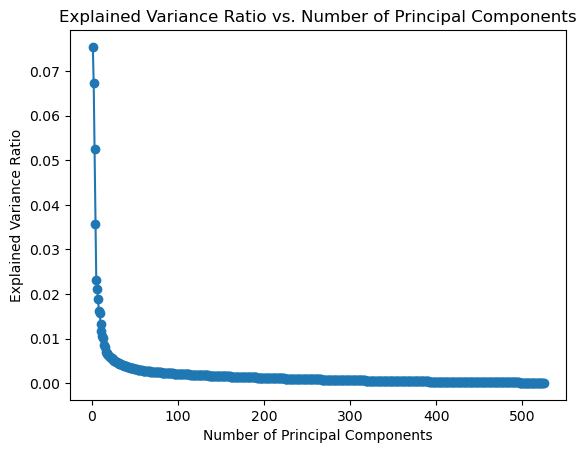

In [27]:
'''Visualize explained variance: You can visualize the explained variance to understand how much information is retained
by each principal component. This will help you identify which components are more important in explaining the variance 
in your data.'''


import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [28]:
#Checking the distribution of components in PC
loadings = pca.components_
print(loadings)

[[ 0.02665281  0.00844252 -0.00644421 ...  0.00187095  0.00725048
   0.03508609]
 [-0.04543772 -0.00116501  0.00425383 ... -0.04387328  0.00881842
   0.02143923]
 [ 0.03392087 -0.00112854 -0.00587648 ... -0.01661253  0.00599012
  -0.00272213]
 ...
 [-0.00741197  0.01722504  0.00701119 ... -0.01114762  0.00352875
   0.12362868]
 [ 0.00266568 -0.00070986  0.00046906 ... -0.00197824 -0.00850965
   0.00806869]
 [-0.01366188  0.00313901  0.0022357  ... -0.0098737   0.00607674
  -0.00672277]]


By looking at the graph showing <span style="color:blue;">explained_variance_ratio_ </span> and having a glance at the pca.components above, we can understand that first principal component (PC) in my PCA analysis explains only around 8% of the variance which further falls with higher PC's.
<span style="color:red;">PC is not capturing a significant amount of information or variability in my dataset.</span>

<span style="color:red;">Here I have to note, that there is missing Domain knowledge for a lot of features in my dataset which is highly dimensional.</span> 

However, the possible reasons for this can be:
1. data may not have a clear linear structure
2. Some datasets naturally have low variance in the first PC due to their inherent characteristics.
3. Low data quality or noisy dataLow data quality or noisy data
4. Irrelevant or redundant features in your dataset

Now firstly, I will be checking linearity in the data structure. If the data is not linear, I will use another method like Kernel PCA for reducing dimensionality.If that is not the case, then I will remove outliers and perform PCA again.


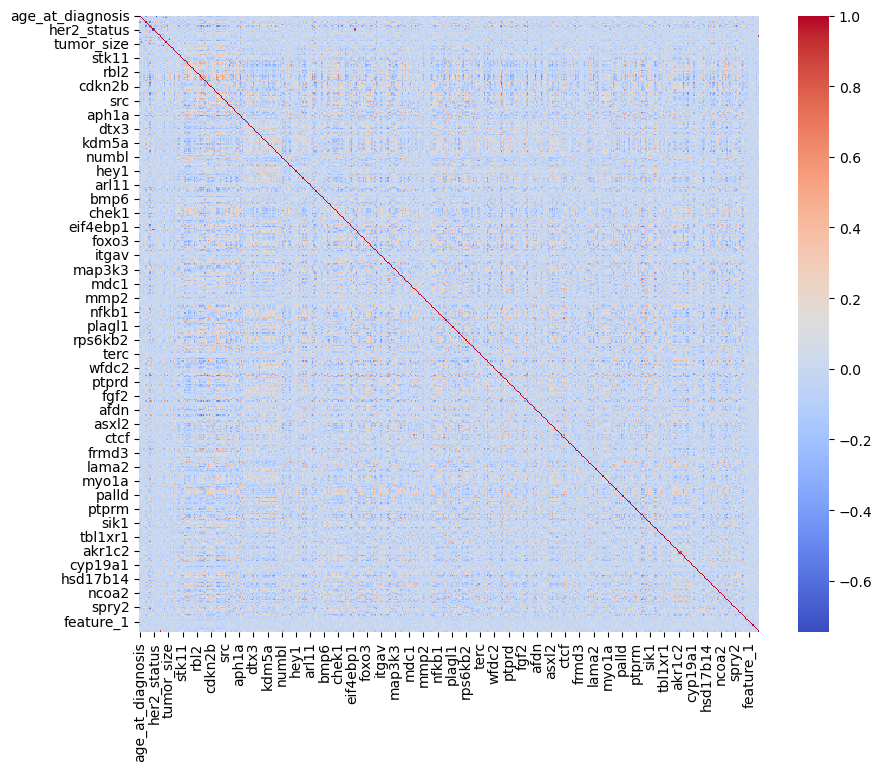

In [29]:
# Assuming df is your high-dimensional dataset
correlation_matrix = df_1.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.show()

Above correlation heatmap, though it shows less to no correlation among variables due to it's blue colour. However,it is not much relaible. Our data still has very high dimensionality, and heatmapes thus fail to capture all features correctly.
Here, we will try running PCA again assumning that there is non-linear relationship among variables.
As pointed above, if it does not give desired results, we will try dropping variables and reducing outliers.

<b><span style="font-size:20px">Kernel PCA</b></span>

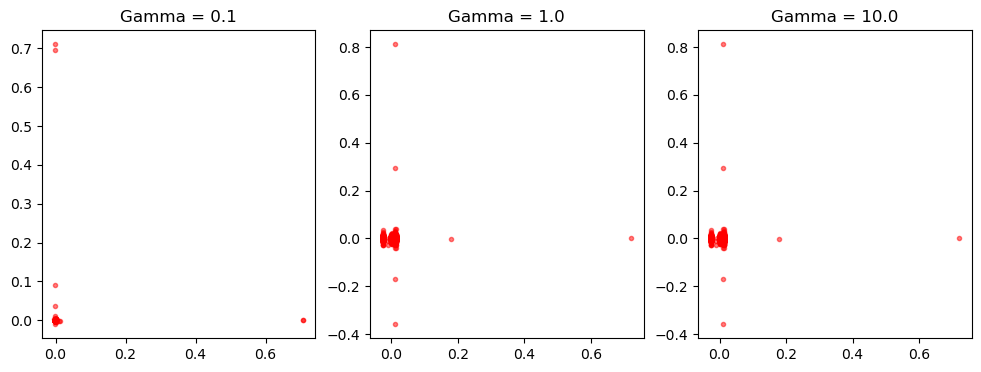

In [30]:
#Kernel PCA

from sklearn.decomposition import KernelPCA

# Performing Kernel PCA with a radial basis function (RBF) kernel

# Defining a range of gamma values to visualize

gamma_values = [0.1, 1.0, 10.0]

plt.figure(figsize=(12, 4))
for i, gamma in enumerate(gamma_values):
    kernel_pca = KernelPCA(kernel='rbf', gamma=gamma)
    X_kernel_pca = kernel_pca.fit_transform(X_scaled)
    
    plt.subplot(1, len(gamma_values), i + 1)
    plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c='r', marker='.', alpha=0.5)
    plt.title(f"Gamma = {gamma}")

plt.show()

<span style="color:red;">Here above I do not see any trend or relationship for any value of Gamma. Thus I will not proceed with idea of non-linear relationship among features.</span>
However, now I will try adjusting for outliers before performing "PCA".
The main reason behind weak relation can be high dimensionality. Absence of feature description further prevents us to drop variables and improve analysis.

In [31]:
#Given the high number of features, we will now use the Z-score method to drop outliers

from scipy import stats
z_scores = np.abs(stats.zscore(X))
threshold = 3                        #Most common value for threshhold
outliers = np.where(z_scores > threshold)

# to remove outliers
X_no_outliers = X[(z_scores < threshold).all(axis=1)]

# Create a boolean mask to identify rows containing outliers
outliers_mask = (z_scores > threshold).any(axis=1)

# Remove rows containing outliers from the original DataFrame
df_1_cleaned = df_1[~outliers_mask]

In [32]:
#Again Running PCA on this new datasedt after standardization

# Performing preprocessing and standardization

X_no_outliers_scaled = scaler.fit_transform(X_no_outliers)

# Fit PCA to the data
pca.fit(X_no_outliers_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

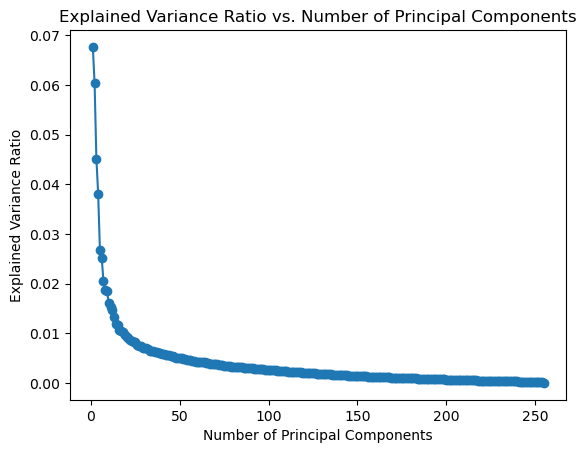

In [33]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

<span style="color:red;">Even after removing outliers there is no change in variance explained by our PC, we will be proceeding  with the same.</span>

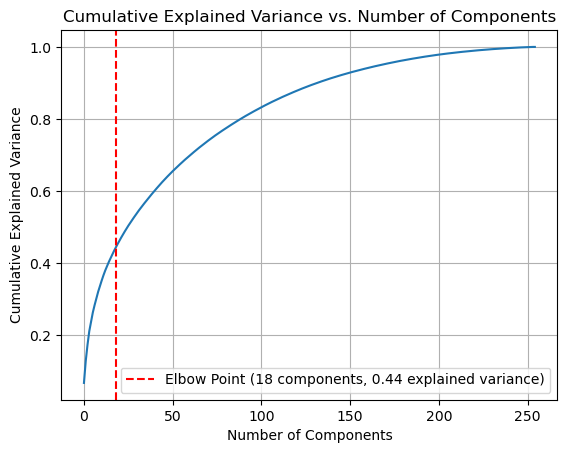

Optimal number of components: 18


In [35]:
# Plotting cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)

# Finding the elbow point (where the curve starts to flatten)
def find_elbow_point(variance):
    for i in range(1, len(variance)):
        if variance[i] - variance[i - 1] < 0.01: 
            return i

elbow_index = find_elbow_point(cumulative_variance)
elbow_variance = cumulative_variance[elbow_index]

# Highlighting the elbow point on the plot

plt.axvline(x=elbow_index, color='red', linestyle='--', label=f'Elbow Point ({elbow_index} components, {elbow_variance:.2f} explained variance)')
plt.legend()

plt.show()

# The elbow_index contains the optimal number of components
print(f'Optimal number of components: {elbow_index}')






In [36]:
# Choose the number of components 
n_components = 18

# Transform the data
X_pca = pca.transform(X_no_outliers_scaled)[:, :n_components]

In [37]:
# Viewing X_pca array to get an idea of the principal components 
print(X_pca)

[[  2.01029247  -8.07183372  -3.68524909 ...  -1.43959649  -2.68304324
    2.28382105]
 [-11.62904792   0.65217645  -1.98660485 ...   1.07876181   0.19990191
    0.59217499]
 [ -4.50940016  -6.30170923  -4.52379734 ...   2.51616771   2.63815867
    2.68852902]
 ...
 [-11.96107581   4.82278975  -3.98820745 ...  -1.08092422   3.58449392
   -1.69796496]
 [ -5.06264643 -15.57194061   0.12253427 ...   1.52911158  -0.7867444
   -0.4911363 ]
 [-12.83143549   0.83961316  -1.69937271 ...  -1.07423446  -0.37907846
    1.08660111]]


<span style="color:Blue">After performing PCA, I am left with 18 principal components stored in X_pca which i will be using to create unsupervised models.</span>

<b><span style="font-size:20px"> Feature Importance</span></b>

Since I have already created PCA, it will not be possible for me to use methods like decision tree or other supervised learnign to extract important features later.
Here, I am finding all the features which are important in creation of first 11 PC.
According to theory and we have seen in explained variance ratio graph above, the first few PC are more important in representing the variance in original features. 
Thus, we will only check top most features in explaining the top 11 PC. 

In [38]:
np.random.seed(0)


train_features = np.random.rand(15,525)

model = PCA(n_components=11).fit(train_features)
X_pc = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = df_1cols
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
data = pd.DataFrame(dic.items(), columns=['Principal Component', 'Most Important Feature'])

print(data)

   Principal Component    Most Important Feature
0                  PC1                     ccnd3
1                  PC2  primary_tumor_laterality
2                  PC3                    spaca1
3                  PC4                     maml2
4                  PC5                      numb
5                  PC6                    pik3r2
6                  PC7                    map2k1
7                  PC8                     bmp10
8                  PC9                     foxp1
9                 PC10                     mapk9
10                PC11                    stat5b


In [39]:
Important_features=['ccnd3','primary_tumor_laterality','spaca1','maml2','numb','pik3r2','map2k1','bmp10','foxp1','mapk9','stat5b']

<b><span style="font-size:24px"> Clustering</span></b>

Now I have my dataset ready, I want to perform clustering methods on the same. I will try 2-3 different clustering methods and check which one works best.
Starting with K-means

<b><span style="font-size:20px">K-means clustering</span></b>

this unsupervised technique aims to minimize the Within-Cluster Sum of Squares (WCSS) and consequently maximize the Between-Cluster Sum of Squares (BCSS).
Here, I am using elbow method to find the optimal K value.
One can also use gap static, Silhouette score,Calinski Harabasz score or Davies Bouldin score to find the optimal K-value.
However, I have used elbow method as it is most commomnly used method

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

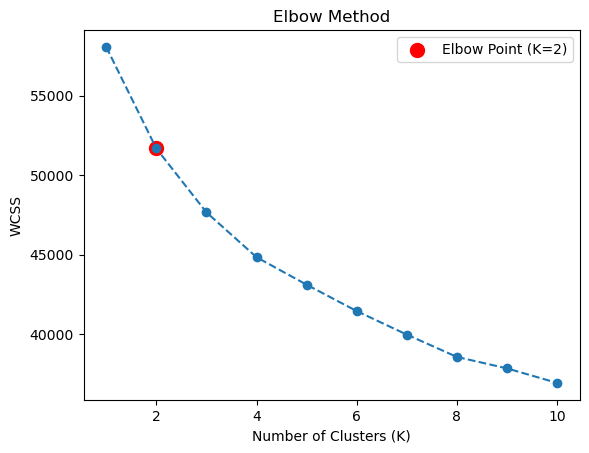

In [40]:

from sklearn.cluster import KMeans

# Using the Elbow Method to find the optimal K

wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Finding the elbow point
elbow_point = None
for k in range(1, len(wcss)):
    reduction_rate = (wcss[k - 1] - wcss[k]) / wcss[k - 1]  # Calculate the rate of reduction
    if reduction_rate > 0.1:  
        elbow_point = k
        break

# Highlighting the elbow point on the graph
if elbow_point is not None:
    plt.scatter(elbow_point + 1, wcss[elbow_point], c='red', marker='o', s=100, label=f'Elbow Point (K={elbow_point + 1})')

plt.legend()
plt.show()


In [41]:
# K-means clustering
# Create and fit a K-Means clustering model

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [42]:
cluster_labels = kmeans.predict(X_pca)

# Add cluster labels to your DataFrame
df_1_cleaned['Cluster'] = cluster_labels

#defining centroids
centroids = kmeans.cluster_centers_


C:\Users\HP\AppData\Local\Temp\ipykernel_12052\467322821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_cleaned['Cluster'] = cluster_labels


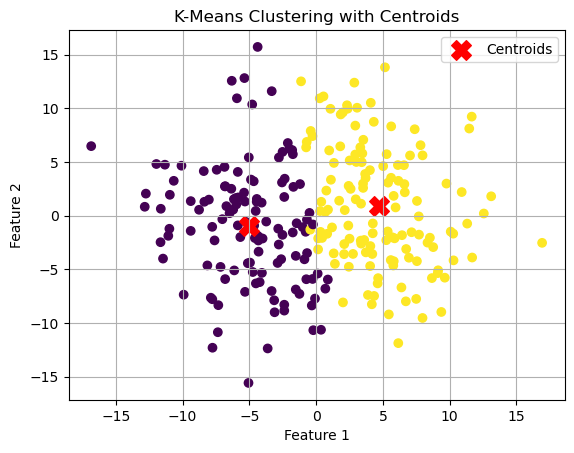

In [43]:
#visualizing cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')

# Plot the centroids as distinct points
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.grid(True)

plt.show()


The plot above shows that my 2 clusters formed in a 2 dimensional space between PC 1 and PC 2 have clear cluster formation with quite distant centroids. Also, there is clear differenec between the points in the first and the second cluster showing negligible overlap between the two clusters.

However, since we have 18 PC's in our analysis. We will further deep dive to see relevance of different features

In [44]:
feature_names_pca = [f'PC{i+1}' for i in range(X_pca.shape[1])]  # Example: PC1, PC2, ..., PC13
cluster_centers_df = pd.DataFrame(centroids, columns=feature_names_pca)

# Find the index (cluster) with the highest centroid value for each feature
key_features = cluster_centers_df.idxmax(axis=0)

# Find the maximum centroid value for each feature
max_centroid_value = cluster_centers_df.max(axis=0)

# Display key features and their corresponding centroids
key_features_and_centroids = pd.DataFrame({'Key Feature': key_features, 'Max Centroid Value': max_centroid_value})
print(key_features_and_centroids)


      Key Feature  Max Centroid Value
PC1             1            4.709924
PC2             1            0.898229
PC3             0            0.140065
PC4             1            0.165717
PC5             0            0.021830
PC6             1            0.111418
PC7             1            0.032494
PC8             1            0.102908
PC9             0            0.149569
PC10            1            0.188261
PC11            0            0.335364
PC12            0            0.182540
PC13            1            0.210028
PC14            1            0.039354
PC15            1            0.016607
PC16            0            0.099625
PC17            0            0.159992
PC18            1            0.030510


This above table gives us the key features and their corresponding maximum centroid values for each of the 13 principal components (PCs) resulting from PCA.

1. Key Feature: This column represents the principal component (PC) in which the maximum centroid value occurs. The "PC1,"        "PC2,"   etc., labels indicate which PC is associated with the maximum centroid value for each feature.

2. Max Centroid Value: This column represents the maximum centroid value for each feature among the clusters. It indicates the importance or influence of each feature in distinguishing clusters. A higher maximum centroid value for a feature suggests that the feature is more important in defining the separation between clusters.

<span style="color:red;">
Interpreting the example output:
</span>

1. For "PC1," the maximum centroid value is approximately 4.709, and it occurs in Cluster 1. This suggests that "PC1" plays a significant role in distinguishing Cluster 1 from Cluster 0. Features associated with "PC1" i.e "ccnd3" contribute most to the separation between these clusters.

2. For "PC2," the maximum centroid value is approximately 0.89, and it occurs in Cluster 1. This indicates that "PC2" i.e "primary_tumor_laterality" is also a key feature in Cluster 1.


3. For "PC11," it is the maximum centroid value in Cluster 0 (approximately 0.33). This indicates that it plays the most important role in distinguishing Cluster 0 from Cluster 1. Thus, "stat5b" is the most important feature in cluster 0.

4. For the remaining PCs, the maximum centroid values are relatively low. This suggests that these PCs have less influence in distinguishing the clusters compared to "PC1," "PC2," and "PC11."


In summary, the output helps you identify the key features (principal components) that are most important in separating clusters in your data. Features associated with PCs that have higher maximum centroid values are more influential in cluster separation, while those with lower maximum centroid values have less influence.



<Figure size 1200x600 with 0 Axes>

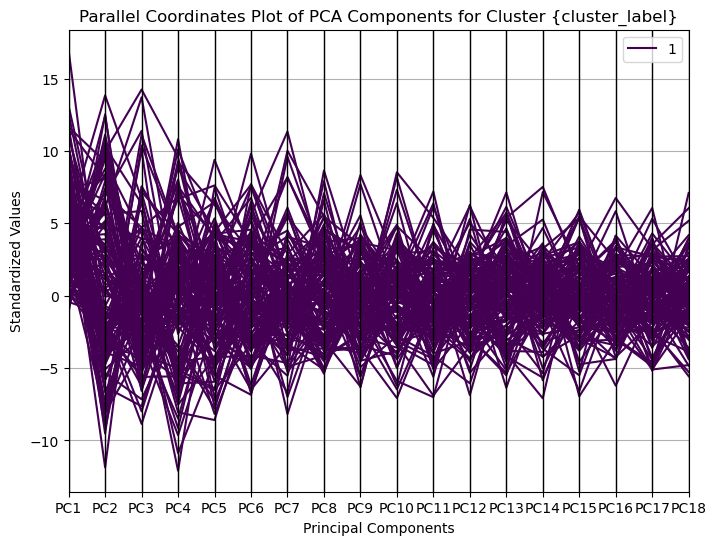

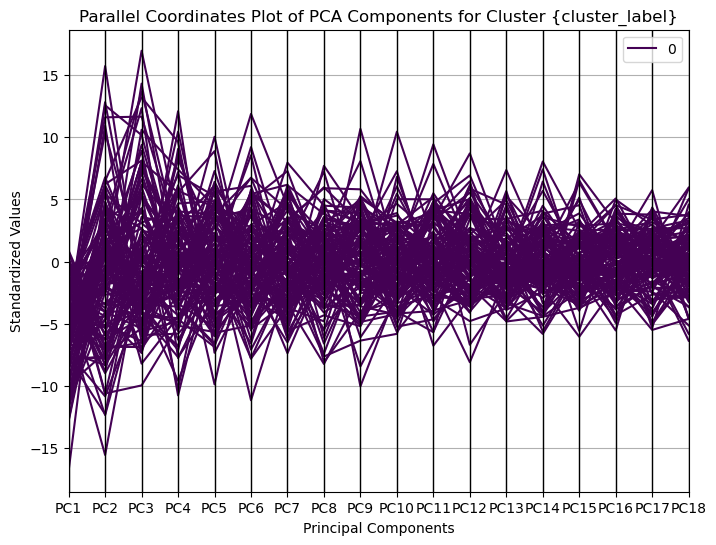

In [45]:
#Checking for important PC in the 2 clusters graphically

from pandas.plotting import parallel_coordinates
# Create a DataFrame containing the principal components and the 'cluster' column
df_pca_clustered = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
# Add cluster labels to the DataFrame
df_pca_clustered['Cluster'] = cluster_labels

# Get unique cluster labels
unique_clusters = df_pca_clustered['Cluster'].unique()


#Normalize the PC columns if needed
#df_pca_clustered.iloc[:, :-1] = (df_pca_clustered.iloc[:, :-1] - df_pca_clustered.iloc[:, :-1].mean()) / df_pca_clustered.iloc[:, :-1].std()

# Create parallel coordinates plots for each cluster
plt.figure(figsize=(12, 6))

for cluster_label in unique_clusters:
    subset = df_pca_clustered[df_pca_clustered['Cluster'] == cluster_label]
    
# Reorder columns to have 'Cluster' as the first column
    cols = ['Cluster'] + [col for col in subset.columns if col != 'Cluster']
    subset = subset[cols]    
    
    # Create a separate figure for each cluster
    plt.figure(figsize=(8, 6))
    parallel_coordinates(subset,'Cluster', colormap='viridis')
    plt.xlabel('Principal Components')
    plt.ylabel('Standardized Values')
    plt.title('Parallel Coordinates Plot of PCA Components for Cluster {cluster_label}')
    plt.show()
    



We have seen the importance of different PC on the centroid of the two clusters and the creation of the two clusters.
Now I want to check the importance of each variable in the original dataset df_1 on the same.

<b><span style="font-size:20px">Feature Value</span></b>

As seen above.finding feature importance after performing Principal Component Analysis (PCA) and then applying K-means clustering can be a bit tricky because PCA transforms the original features into a set of orthogonal components, and these components are linear combinations of the original features. Therefore, traditional methods for feature importance like feature importance scores from decision trees or linear regression coefficients don't directly apply to PCA-transformed data.

Now that we have important features with us as found above,we will find a way to get values for the same. 
To get some insights into feature values in the context of PCA and K-means we are examining the loadings of the original features onto the principal components. 


In [46]:
# Since we already have important features, our task is to find Feature Values for Kmeans 
# Group data by cluster and calculate statistics for important features
cluster_stats = df_1_cleaned.groupby('Cluster')[Important_features].agg(['mean', 'std'])
cluster_stats_df = pd.DataFrame(cluster_stats)
cluster_stats_df.head()

ccnd3           primary_tumor_laterality              spaca1  \
             mean       std                     mean       std      mean   
Cluster                                                                    
0       -0.279978  0.853344                 0.918699  0.971677 -0.064147   
1       -0.063544  0.789672                 0.878788  0.980966 -0.048634   

                      maml2                numb            ...   map2k1  \
              std      mean       std      mean       std  ...     mean   
Cluster                                                    ...            
0        0.931534 -0.009212  0.738764 -0.022337  0.682309  ...  0.03646   
1        0.901321 -0.025038  0.759525  0.350862  0.761294  ... -0.42010   

                      bmp10               foxp1               mapk9            \
              std      mean       std      mean       std      mean       std   
Cluster                                                                         
0        0.631221 -0.129477  0.975585  0.082562  0.687960  0.303018  0.733178   
1        0.671011 -0.059948  0.959931 -0.065448  0.798141  0.057735  0.724318   

           stat5b            
             mean       std  
Cluster                      
0        0.013752  0.765535  
1        0.390084  0.710639  

[2 rows x 22 columns]

Above graph showing spread of different principal components along dataframe can be referred to find distribution of each important feature in both clusters. 
Here, we see while some values has positive impact on clusters, some have negative. The standard deviation is also important factor in our analysis.

<span style="color:red;">Eg, PC1 and therefore 'ccnd3' which was an important feature to determine cluster 1 has a higher absolute mean in case of cluster 0 with high standard seviation compared to cluster 1. As evident from the graph also, PC1 shows more positive standardised value for cluster 1 than for cluster 0.</span>



In [47]:
# Evaluating the quality of the clustering results using silhouette score and  Davies-Bouldin index

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

silhouette_avg = silhouette_score(X_pca, cluster_labels)
# Print the silhouette score
print("Silhouette Score:", silhouette_avg)



davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)
# Print the Davies-Bouldin index
print("Davies-Bouldin Index:", davies_bouldin)


Silhouette Score: 0.1026986518023082
Davies-Bouldin Index: 2.7835847917755343


<span style="color:Blue;"> Here, we see that we have a </span> <span style="color:Black;"><b>relatively low Silhouette Score</b></span> <span style="color:Blue;">since Silhouette Score range between [-1,1], that means objects in our clusters are relatively close to the decision boundary between clusters.</span>
    
<span style="color:Blue;">The Davies-Bouldin Index measures the average similarity between each cluster with the cluster that is most similar to it.
A </span> <b><span style="color:Black;">Davies-Bouldin Index</span></b> <span style="color:Blue;">of approximately 2.78 indicates that the clusters might not be very well-separated or distinct. It suggests that there might be some similarity or overlap between clusters.
</span>

However, there is also a huge dimensionality in our dataset here. There is no clear clustert in our dataset and this might be the reason for the same.


Now, we will try other methods of Clustering to see if they perform better for oyr dataset.

<b><span style="font-size:20px">Hierarchical Clustering</span></b>


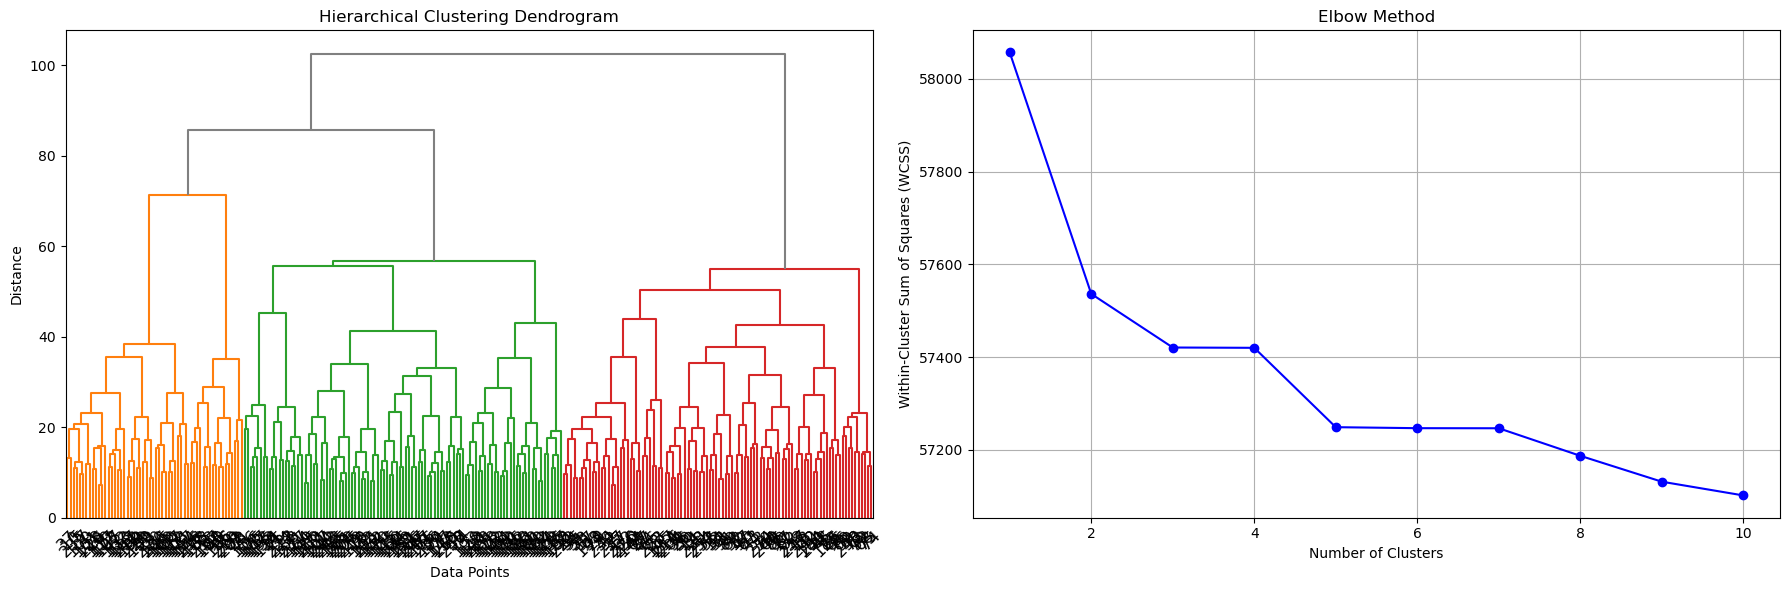

In [48]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_matrix = linkage(X_pca, method='ward')

# Create a figure with two subplots: dendrogram and elbow plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Create the dendrogram subplot
dendrogram(linkage_matrix, labels=range(len(X_pca)), orientation='top', distance_sort='descending', show_leaf_counts=True, leaf_font_size=12, above_threshold_color='gray', ax=ax1)
ax1.set_xlabel("Data Points")
ax1.set_ylabel("Distance")
ax1.set_title("Hierarchical Clustering Dendrogram")
ax1.tick_params(axis='x', rotation=45)

# Create the elbow plot subplot
wcss_values = []
max_clusters = 10  # Adjust this based on your dataset

for i in range(1, max_clusters + 1):
    cluster_labels = fcluster(linkage_matrix, i, criterion='maxclust')
    wcss = sum(((X_pca[cluster_labels == j] - X_pca[cluster_labels == j].mean()) ** 2).sum() for j in range(1, i + 1))
    wcss_values.append(wcss)

ax2.plot(range(1, max_clusters + 1), wcss_values, marker='o', linestyle='-', color='b')
ax2.set_title('Elbow Method')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
ax2.grid(True)

# Display the combined figure with both subplots
plt.tight_layout()
plt.show()


In [49]:
#According to elbow method, we should use 2 clusters here.

# Specify the desired number of clusters
num_clusters = 2  

# Assign cluster labels based on the desired number of clusters
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')


In [50]:
#Evaluating the method
silhouette_avg = silhouette_score(X_pca, cluster_labels)
# Print the silhouette score
print("Silhouette Score:", silhouette_avg)



davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)
# Print the Davies-Bouldin index
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.0845968336210903
Davies-Bouldin Index: 2.9881102828383144


We see from the graph and the Silhouette Score and Davies-Bouldin Index that this method does not perform clusering very well. We will further proceed with another methods:

<b><scan style="font-size:20px"> DBSCAN Method </scan></b>


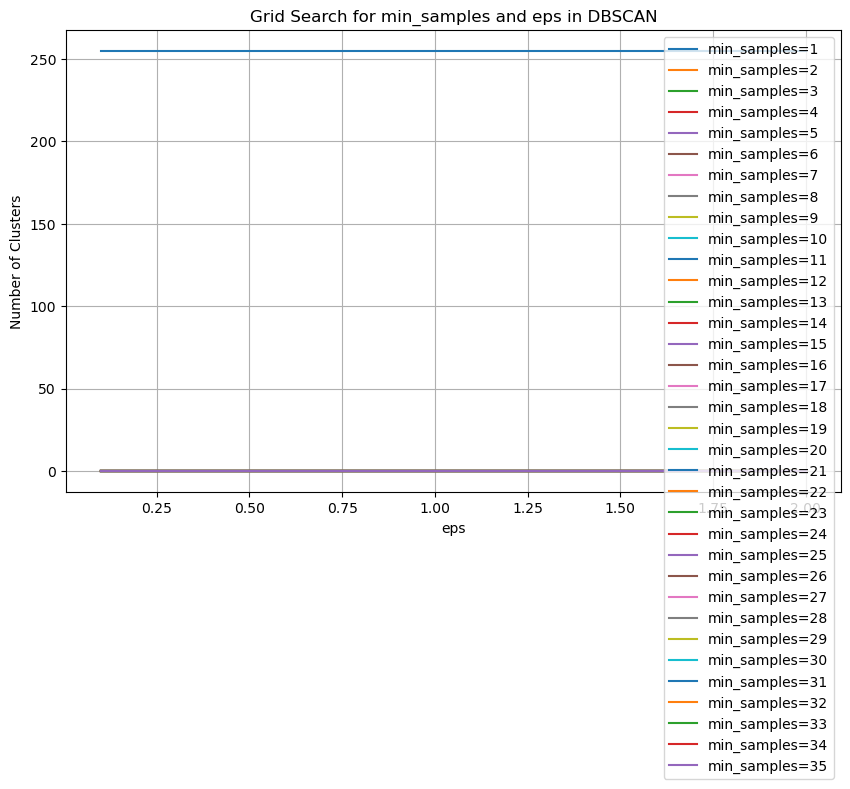

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Define ranges for min_samples and eps
min_samples_range = range(1, 36)  # Adjust as needed
eps_range = np.linspace(0.1, 2.0, num=20) 


# Store the number of clusters for each combination of min_samples and eps
num_clusters = np.zeros((len(min_samples_range), len(eps_range)))


for i, min_samples in enumerate(min_samples_range):
    for j, eps in enumerate(eps_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_pca)
        cluster_labels = dbscan.labels_
        num_clusters[i, j] = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Plot the number of clusters for different combinations of min_samples and eps
plt.figure(figsize=(10, 6))
for i, min_samples in enumerate(min_samples_range):
    plt.plot(eps_range, num_clusters[i, :], label=f"min_samples={min_samples}")

plt.title('Grid Search for min_samples and eps in DBSCAN')
plt.xlabel('eps')
plt.ylabel('Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


The graph above visualize how the number of clusters changes for different combinations of min_samples and eps. We see that the numberf of cluster remains 0 for a vast values of eps. Further, I tried running DBSCAN for many different values of min_samples but our output remain the same as we will see. 

In [52]:
# DBSCAN clustering
# Since DBSCAN is robust to outliers,I will be using X_pca for my analysis
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=5)

# Fit the DBSCAN model to the data
dbscan.fit(X_pca)

# Get the cluster labels (-1 indicates noise/outliers)
cluster_labels = dbscan.labels_

# Print the cluster labels for each data point
print("Cluster Labels:")
print(cluster_labels)

# Get the number of clusters (excluding noise)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Number of Clusters: {num_clusters}")

Cluster Labels:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Number of Clusters: 0


We see that DBSCAN didn't identify any clusters in our data. I have tried running this for multiple values of esp and min_samples but i get the same result.
This result suggests that the data may not have clear density-based clusters. Since my data is alreadt standardized and treated for missing an outlier values. The possible reason can be high dimensionality.

To varify the distribution further, I have used another method:

<b><span styel="font-size:22px">t-SNE method</span></b>

255


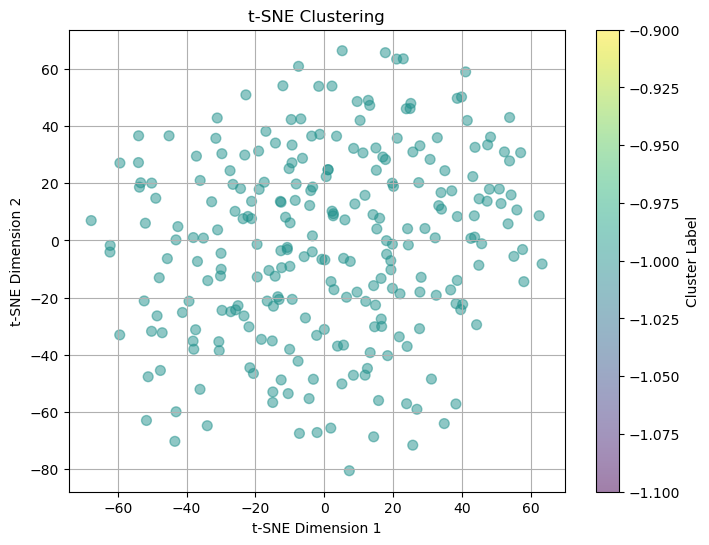

In [53]:
#t-SNE method
from sklearn.manifold import TSNE

# Create a t-SNE instance
tsne = TSNE(n_components=3, random_state=42)

# Apply t-SNE to your data
tsne_result = tsne.fit_transform(X_pca)

# Check the dimensions of tsne_result and cluster_labels
print(len(tsne_result))

# Create a scatter plot of the t-SNE results with different colors for clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=50, alpha=0.5)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Clustering')
plt.colorbar(label='Cluster Label')  # Add a colorbar to indicate cluster labels
plt.grid(True)

# Display the plot
plt.show()

The plot above shows scattered data points and no clear clusters. This indicates the data may not have any well-defined or inherent clusters thus making it challenging to find meaningful clusters using unsupervised clustering techniques.

High-dimensional data often exhibits increased sparsity and complexity, making it difficult to visualize and identify clusters in lower dimensions. t-SNE is a dimensionality reduction technique that aims to preserve local relationships, but in high dimensions, it can still lead to scattered points.

<b><span style="font-size:24px">Conclusion</span></b>

In this analysis, we began with a very high Dimensional dataset with 692 different features. We treated missing values and Encoded categorial features and reduced these to 525 different features. However, they are still very high for analysis.
To solve this, we employed Principal Component Analysis (PCA) which created 18 different Principal Components which were nothing but a linear combination of our features.

Now since we did not have any target variable, to understand our dataset further, we utilized 4 different Clustering methods.

The below table shows performance in respect to each one of them:

<style>
    table {
        font-size: 24px;
    }
</style>

| Clustering Method | Silhouette Score | Davies-Bouldin Index |
|-------------------|------------------|------------------    |
| KMeans            | 0.103            | 2.78                 |
| Hierarchical      | 0.085            | 2.98                 |
| DBSCAN            | na               | na                   |    
| t-SNE             | na               | na                   |


Clearly, all the methods could not perform clustering very well even when the data was standardized and there were no outliers. This has to do with the the inherent properties of dataset and high dimensionality. However, Kmeans has performed the best among them all with higher Silhouette Score and lower Davies-Bouldin Index.

DBSCAN failed to find any clusters. t-SNE confirmed how scattered the dataset was.

From KMeans we have also identified the Important features and their values.

ccnd3, primary_tumor_laterality, stat5b are very important in defining clusters. 
Apart from them, 'spaca1','maml2','numb','pik3r2','map2k1','bmp10','foxp1','mapk9' are all important features.

Their feature values can be assesed from dataframe cluster_stats_df.







<b><span style="font-size:24px">Reference</span></b>

1) [Analyze the Results of a K-means Clustering by Llewelyn Fernandes](https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering)

2) [Interpretable K-Means: Clusters Feature Importances by Yousef Alghofaili](https://towardsdatascience.com/interpretable-k-means-clusters-feature-importances-7e516eeb8d3c#7e14)

3) [PCA clearly explained —When, Why, How to use it and feature importance: A guide in Python by Serafeim Loukas, PhD](https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e#:~:text=The%20importance%20of%20each%20feature,higher%20magnitude%20%E2%80%94%20higher%20importance)

4) [Feature Extraction using Principal Component Analysis — A Simplified Visual Demo by Kai Zhao](https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a)

5) [K-means, DBSCAN, GMM, Agglomerative clustering — Mastering the popular models in a segmentation problem
 by Indraneel Dutta Baruah](https://medium.com/towards-data-science/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29)
